# Assignment #2

XI1_ATCACG_L001_R1_001.fastq, 
XI1_ATCACG_L001_R2_001.fastq, 
RETT-1_S1_L001_R1_001.fastq, 
RETT-1_S1_L001_R2_001.fastq.

Above are abbreviated next generation sequencing files from a paired-end run.
The XI1 reads are mostly 250 base pairs long,
The RETT reads are mostly 150 base pairs long.

Complicating the assignment, there are a few reads that are a few bases shorter or longer than 250 or 150.

## Prompt 1

1. Write a Python function that for each of the positions 1 to 250 (or 1 to 150) will compute the fraction of reads in the file with quality scores greater than or equal to 30 at that position. For each of the 4 files plot the output.

Function for Prompt 1.

In [88]:
def posQual (fname, rlength, qThres):
    '''for each position up to 'rlenght' across all reads in 'fname',
    computes fraction of quality score greater than or equal to 'qThres'.
    Takes as input: file name, read length, and quality threshold cutoff'''
    infile = open(fname)  # open the file
    totalRead = [0]*rlength  # list to keep track, at each position, how many reads assessed
    qualGrEq30 = [0]*rlength  # list to keep track, at each position, how many quality scores above 'qThres'
    cnt = 0  # keeps track of lines as function walks through file
    for line in infile:
        cnt += 1  # increases 'cnt' by 1 for each line
        line = line.replace("\n", "")  # we don't want end-of-line characters
        line = line.replace("\r", "")  # or carriage-return characters
        if cnt % 4 == 0:  # apply if 'cnt' divided by 4 leaves remainder 0; therefore, applies to every 4th line
            for i in range(len(line)):
                if i < rlength:  # only run if i is at position 'rlength' or less
                    totalRead[i] += 1
                    qScore = ord(line[i]) - 33  # determines quality score of character in position i of 'line'
                    if qScore >= qThres:  # assess if quality score is greater than or equal to 'qThres'
                        qualGrEq30[i] += 1
    infile.close()  # close the file
    res = [i / j for i, j in zip(qualGrEq30, totalRead)]
    return res

Run function for each of the 4 files.

In [89]:
pq_XI1_R1 = posQual("XI1_ATCACG_L001_R1_001.fastq", 250, 30)
pq_XI1_R2 = posQual("XI1_ATCACG_L001_R2_001.fastq", 250, 30)
pq_RETT_R1 = posQual("RETT-1_S1_L001_R1_001.fastq", 150, 30)
pq_RETT_R2 = posQual("RETT-1_S1_L001_R2_001.fastq", 150, 30)

Plot output for each of the 4 files.

Plot for XI1 reads.

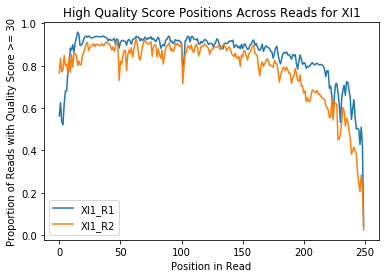

In [90]:
import matplotlib.pyplot as plt  # imports python module for plotting
plt.plot(pq_XI1_R1, label = "XI1_R1")
plt.plot(pq_XI1_R2, label = "XI1_R2")
plt.legend(loc = "lower left")
plt.title("High Quality Score Positions Across Reads for XI1")
plt.ylabel("Proportion of Reads with Quality Score >= 30")
plt.xlabel("Position in Read")
plt.show()

Plot for RETT reads

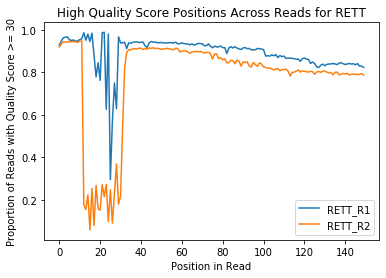

In [91]:
plt.plot(pq_RETT_R1, label = "RETT_R1")
plt.plot(pq_RETT_R2, label = "RETT_R2")
plt.legend(loc = "best")
plt.title("High Quality Score Positions Across Reads for RETT")
plt.ylabel("Proportion of Reads with Quality Score >= 30")
plt.xlabel("Position in Read")
plt.show()

## Prompt 2

2. Write another function that for k from 0 to 250 (or from 0 to 150) will count the number of reads in the file with exactly k number of positions with quality scores greater than or equal to 30. For each of the 4 files plot the output.

Function for Prompt 2.

In [92]:
def rQual (fname, rlength, qThres):
    '''for each number <= 'rlength', counts how many reads in 'fname' have exactly
    that many quality scores above 'qThres'.
    Takes as input: file name, read length, and quality threshold cutoff'''
    infile = open(fname)  # open the file
    readQualGr30 = [0] * (rlength + 1)  # list to keep track, for each number 0 to 'rlength', how many reads have exactly that many quality scores above 'qThres'
    cnt = 0  # keeps track of lines as function walks through file
    for line in infile:
        cnt += 1  # increases 'cnt' by 1 for each line
        line = line.replace("\n", "")  # we don't want end-of-line characters
        line = line.replace("\r", "")  # or carriage-return characters
        if cnt % 4 == 0:  # apply if 'cnt' divided by 4 leaves remainder 0; therefore, applies to every 4th line
            posGr30 = 0  # keeps track of how many positions with quality score greater than 30
            for i in range(len(line)):
                if i < rlength:  # only run if i is at position 'rlength' or less
                    qScore = ord(line[i]) - 33  # determines quality score of character in position i of 'line'
                    if qScore >= qThres:  # assess if quality score is greater than or equal to 'qThres'
                        posGr30 += 1
            readQualGr30[posGr30] += 1
    return readQualGr30
    infile.close()  # close the file

Run function for each of the 4 files.

In [93]:
rq_XI1_R1 = rQual("XI1_ATCACG_L001_R1_001.fastq", 250, 30)
rq_XI1_R2 = rQual("XI1_ATCACG_L001_R2_001.fastq", 250, 30)
rq_RETT_R1 = rQual("RETT-1_S1_L001_R1_001.fastq", 150, 30)
rq_RETT_R2 = rQual("RETT-1_S1_L001_R2_001.fastq", 150, 30)

Plot output for each of the 4 files.

Plot for XI1 reads.

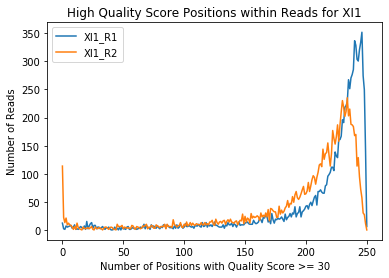

In [94]:
plt.plot(rq_XI1_R1, label = "XI1_R1")
plt.plot(rq_XI1_R2, label = "XI1_R2")
plt.legend(loc = "best")
plt.title("High Quality Score Positions within Reads for XI1")
plt.ylabel("Number of Reads")
plt.xlabel("Number of Positions with Quality Score >= 30")
plt.show()

Plot for RETT reads

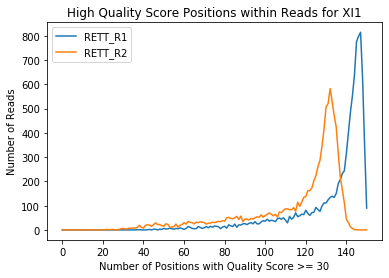

In [95]:
plt.plot(rq_RETT_R1, label = "RETT_R1")
plt.plot(rq_RETT_R2, label = "RETT_R2")
plt.legend(loc = "best")
plt.title("High Quality Score Positions within Reads for XI1")
plt.ylabel("Number of Reads")
plt.xlabel("Number of Positions with Quality Score >= 30")
plt.show()

# Application Question

From these files, can we say anything about how sequence quality appears to depend on
position or read number? 

Data from these files suggest that quality scores are best at the middle part of a read. For the RETT files, there seems to be a block of low quality scores across reads for bases towards the beginning of a sequence, approximately from positions 10-35. Although not as dramatic, for the XI1 files, less reads have high qualitiy scores for bases approximately position 0-25. For the XI1 files, quality scores drop off across reads for bases towards the end of the sequence, starting approximately after 150. Although not as dramatic, for the RETT files, the number of reads with high quality scores drop off starting approximately after 80.

Data from these files suggest that within a run, the majority of reads have high quality scores for the majority of the sequence. For both XI1 and RETT files, there are large number of reads with large porportion of positions at high quality scores.